# Topics:
    - Using gradient descent
    - Updating w and with GD and LR
    - Using the Loss Function LCE: Cross Entropy
    - Using the Sigmoid as the logistic activation
    - Vis

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from mpl_toolkits import mplot3d
## Confusion matrix (fancy)
import seaborn as sns 
from sklearn.metrics import confusion_matrix  

# Simple dataset

In [2]:
plt.rcParams["figure.figsize"] = (12, 9)

datafile="SimpleLogRegDataSetBB_Players.csv"
## Here is the tiny dataset:
    ## Once you get this code to work on this tiny, easy, and already 
    ## normalized dataset, try it on something more complex ;)
    
##   Weight  Height  BB_Player
#     1.0    1.00          1
#     0.5    0.75          1
#     0.0    0.00          0
#     0.1    0.10          0
#     0.6    0.75          1


## !! Update this to YOUR path
DF = pd.read_csv(datafile)
print(DF)

   Weight  Height  BB_Player
0     1.0    1.00          1
1     0.5    0.75          1
2     0.0    0.00          0
3     0.1    0.10          0
4     0.6    0.75          1


In [3]:
## Set y to the label. Check the shape!
y = np.array(DF.iloc[:,2]).T
#y = np.array([y]).T
print("y is\n", y)
print("The shape of y is\n", y.shape) 

y is
 [1 1 0 0 1]
The shape of y is
 (5,)


## NOTE: Normalize the data (and not the label!)

### Min-Max**


In [4]:
DF=(DF-DF.min())/(DF.max()-DF.min())

### Or z norm....


In [5]:
#DF=(DF-DF.mean())/DF.std()  ## z stardard method

If your dataset is already normal, skip the above.


## Place the data (and not the labels) in DF

In [6]:
DF=DF.iloc[:, [0, 1]]
print(DF)
X = np.array(DF)
print("X is\n", X)
print("The shape of X is\n", X.shape)

   Weight  Height
0     1.0    1.00
1     0.5    0.75
2     0.0    0.00
3     0.1    0.10
4     0.6    0.75
X is
 [[1.   1.  ]
 [0.5  0.75]
 [0.   0.  ]
 [0.1  0.1 ]
 [0.6  0.75]]
The shape of X is
 (5, 2)


[1 1 0 0 1]
[1.  0.5 0.  0.1 0.6]


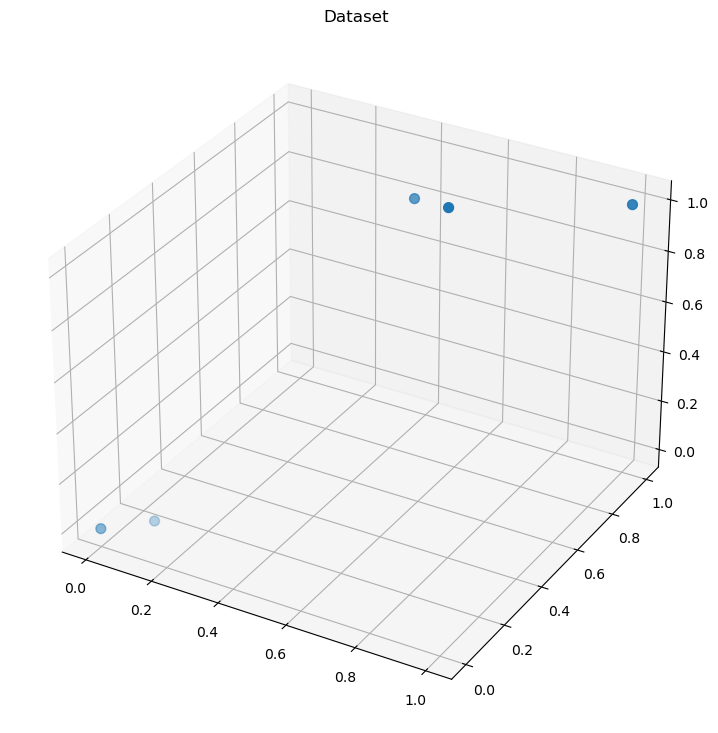

In [7]:
##InputColumns = 2
##NumberOfLabels = 2
n = len(DF) ## number of rows of entire X
## Take the label off of X and make it a numpy array
#Learning Rate
LR=1
## Look at the dataset..........
fig = plt.figure()
ax = plt.axes(projection='3d')
y = y
x1 = X[:,0]
x2 = X[:,1]
print(y)
print(x1)
# plotting
ax.scatter(x1, x2, y, s=50)
ax.set_title('Dataset')
plt.show()

## Set up initial weights and biases


In [8]:
w = np.array([[1,1]])
b = 0
print(w)
print(w.shape)

[[1 1]]
(1, 2)


Before we move forward, we know that at some point we will need to properly multiply $\mathbf{X}$ and $\mathbf{w}$.

 Let's try to do this now. Recall that our linear equation looks like

$w_1x_1 + w_2x_2 + b$


In [9]:
print("X is\n",X)
print("The shape of X is\n", X.shape)  
print("w is\n",w)
print("w tranpose is\n", w.T)
print("The shape of w transpose is\n", w.T.shape)

z = (X @ w.T) + b
print("z = (X @ w.T) + b\n", z)
print("The shape of z is\n", z.shape)

X is
 [[1.   1.  ]
 [0.5  0.75]
 [0.   0.  ]
 [0.1  0.1 ]
 [0.6  0.75]]
The shape of X is
 (5, 2)
w is
 [[1 1]]
w tranpose is
 [[1]
 [1]]
The shape of w transpose is
 (2, 1)
z = (X @ w.T) + b
 [[2.  ]
 [1.25]
 [0.  ]
 [0.2 ]
 [1.35]]
The shape of z is
 (5, 1)


OK! Do this by hand as well and compare.

# Sigmoid function
Next, we need to apply the sigmoid function to all the $z$ value results. Let's create a function for sig

In [10]:
def Sigmoid(s, deriv=False):
    if (deriv == True):
        return s * (1 - s)
    return 1/(1 + np.exp(-s))

## TEST YOUR FUNCTION!

In [11]:
print(Sigmoid(2)) ## answer should be .88079

0.8807970779778823


OK - it works and so now we can create `S_z` ($S(z)$) by applying the sigmoid to all the values in $z$

In [12]:
S_z = Sigmoid(z)
print("S(z) is\n", S_z)

S(z) is
 [[0.88079708]
 [0.77729986]
 [0.5       ]
 [0.549834  ]
 [0.79412963]]


Note that `S_z` ($S(z)$) here is the same as $\hat{y}$

It is the output of the logistic regression

In [13]:
y_hat = S_z

**Do and check this by hand.**


# Loss function
-  What is our Loss function?
- How do we calculate the error

Recall that our Loss function is the *LCE* - *Loss Categorical Entropy* function for binary (0 and 1) labels. 

$$L_{CE} = -\frac{1}{n} \sum ylog(\hat{y}) + (1 - y)log(1 - \hat{y})$$

where $\hat{y}$ is the *predicted* value and the $log$ is $log$ base $2$. The "$y$" is the label, which here is 0 or 1. 
The "$n$" is the number of rows in the dataset. 

Now, think about what we are doing. We want to *minimize* the $L_{CE}$ by updating $\mathbf{w}$ and $b$ using gradient descent. Our `LR` (learning rate) was set above and can be tuned. 

Shapes matter when using vectors and matrices. Here, we will need to transpose $y$

In [14]:
print("y is\n",y)
print("y_hat is\n", y_hat)

y is
 [1 1 0 0 1]
y_hat is
 [[0.88079708]
 [0.77729986]
 [0.5       ]
 [0.549834  ]
 [0.79412963]]


Here, $y$ is not the right shape for our goal. We need the transpose. **YOU must always check on these types of things.**

In [15]:
#print(type(y))
#print(np.transpose([y])) ## you need the []
y = np.transpose([y])
print("Updated y is\n",y)
print("y_hat is\n",y_hat)

Updated y is
 [[1]
 [1]
 [0]
 [0]
 [1]]
y_hat is
 [[0.88079708]
 [0.77729986]
 [0.5       ]
 [0.549834  ]
 [0.79412963]]


In [16]:
##----------------------------------
## Keep each LCE value
AllError_LCE=[]
##----------------------------------

## The epochs are the number of iterations we want to go through
## to recalculate w and b with the goal of optimization (minimization of LCE)
epochs=200

for i in range(epochs):
    print("Epoch \n", i)
    z = (X @ w.T) + b
    print("The z here is\n", z)
    y_hat=Sigmoid(z)
    print("The y_hat here is\n", y_hat)
    
    ## Get the LCE....
    Z1=(y*np.log2(y_hat)) + ((1 - y)*np.log2(1 - y_hat))
    print("Z1 is\n", Z1)
    
    ## Next, we need to sum the values in Z1 and then divide by n
    LCE = -(np.sum(Z1))/n  ## its "-" in front because we multiply by -1/n
    print("The LCE for epoch ", i, "is\n", LCE)
    
    ##Keep each LCE value - each error
    AllError_LCE.append(LCE)
    
    ## Now we need to get the derivatives so we can update w and b
    ## Recall that dL/dw = dL/dy^ * dy^/dz * dz/dw --> 1/n (y^ - y)xT
    ## and dL/db = dL/dy^ * dy^/dz * dz/db --> 1/n (y^ - y)

    ## Let's get y^ - y first and let's call this "error"
    error = y_hat-y
    print("The error y^ - y is\n", error)
    ## Next, let's multiply the y^-y by X so that we
    ## get the shape of w. Recall that w is 1 row by 2 columns
    ## Let's print this to make sure ...
    print(w)
    print(w.shape)
    
    dL_dw = (1/n) * np.transpose(error) @ X
    print("The dL_dw is\n", dL_dw, "\n")
    
    ## Now let's get b
    ## For b, we will use the average - so we will sum up 
    ## all the error values and then multiply by 1/n
    ## Let's first get 1/n (y^ - y)
    b1=(1/n)*(error)
    print(b1)
    ## Now get the mean of this vector
    dL_db=np.average(b1)
    print("The dL_db is\n", dL_db)
    
    ## OK - let's look at new w and new b
    print("The update for w is\n",dL_dw)
    print("The update for b is\n", dL_db)
    
    ## Use the gradient to update w and b
    w = w - (LR * dL_dw)
    b = b - (LR * dL_db)
    
    print("The new w value is\n", w)
    
##end of for loop-------------------------

Epoch 
 0
The z here is
 [[2.  ]
 [1.25]
 [0.  ]
 [0.2 ]
 [1.35]]
The y_hat here is
 [[0.88079708]
 [0.77729986]
 [0.5       ]
 [0.549834  ]
 [0.79412963]]
Z1 is
 [[-0.18311841]
 [-0.36345684]
 [-1.        ]
 [-1.15147099]
 [-0.33255357]]
The LCE for epoch  0 is
 0.6061199619961776
The error y^ - y is
 [[-0.11920292]
 [-0.22270014]
 [ 0.5       ]
 [ 0.549834  ]
 [-0.20587037]]
[[1 1]]
(1, 2)
The dL_dw is
 [[-0.05981836 -0.07712948]] 

[[-0.02384058]
 [-0.04454003]
 [ 0.1       ]
 [ 0.1099668 ]
 [-0.04117407]]
The dL_db is
 0.020082422586564168
The update for w is
 [[-0.05981836 -0.07712948]]
The update for b is
 0.020082422586564168
The new w value is
 [[1.05981836 1.07712948]]
Epoch 
 1
The z here is
 [[ 2.11686542]
 [ 1.31767387]
 [-0.02008242]
 [ 0.19361236]
 [ 1.42365571]]
The y_hat here is
 [[0.89253163]
 [0.78879444]
 [0.49497956]
 [0.54825245]
 [0.80591088]]
Z1 is
 [[-0.16402479]
 [-0.34227871]
 [-0.98558632]
 [-1.14641133]
 [-0.31130779]]
The LCE for epoch  1 is
 0.589921789791

## Plot and print results  

The predicted w is 
 [[3.70889215 4.94388297]]
The predicted b is
 -2.5408498883681756


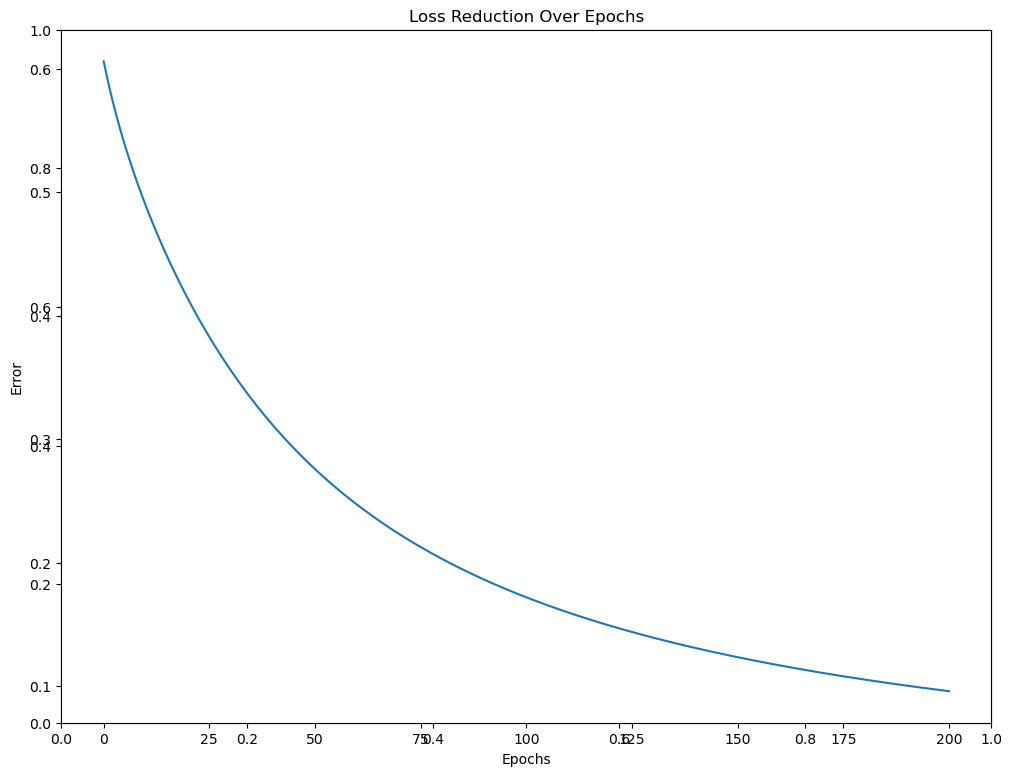

In [17]:
#-----------------------------------------
#print(len(AllError_LCE))
##Plot the change in Loss over epochs
fig1 = plt.figure()
plt.title("Loss Reduction Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
ax = plt.axes()
x = np.linspace(0, epochs, epochs) #start, stop, how many 
#print(x.shape)
ax.plot(x, AllError_LCE)    

print("The predicted w is \n", w)
print("The predicted b is\n",b)

# Use the model from above to make predictions. 

Read in test data

**!!! Remember that this model from above is ONLY for `Height`, `Weight` data to predict `BB_Player` as 0 or 1.**

*NOTE:* You can update this code however to work on modeling any data.

**Note also that this code assumes that the data is min-max normalized.**


In [18]:
## Define X_test as:
X_test=np.array([ [.9,.6],[.2,.15],[.85,.78],[.13,.15],[.63,.65]])
print(X_test)
print(X_test.shape)
labels=np.array([[1],[0],[1],[0],[1]])
print(labels)
Prediction=Sigmoid((X_test @ w.T) + b)

[[0.9  0.6 ]
 [0.2  0.15]
 [0.85 0.78]
 [0.13 0.15]
 [0.63 0.65]]
(5, 2)
[[1]
 [0]
 [1]
 [0]
 [1]]


In [19]:
## Update prediction using threshold >=.5 --> 1, else 0
Prediction[Prediction >= .5] = 1
Prediction[Prediction < .5] = 0

print(Prediction)

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]]


## Confusion matrix (fancy)

[[2 0]
 [0 3]]


[Text(0, 0.5, 'Not BB Player'), Text(0, 1.5, 'BB Player')]

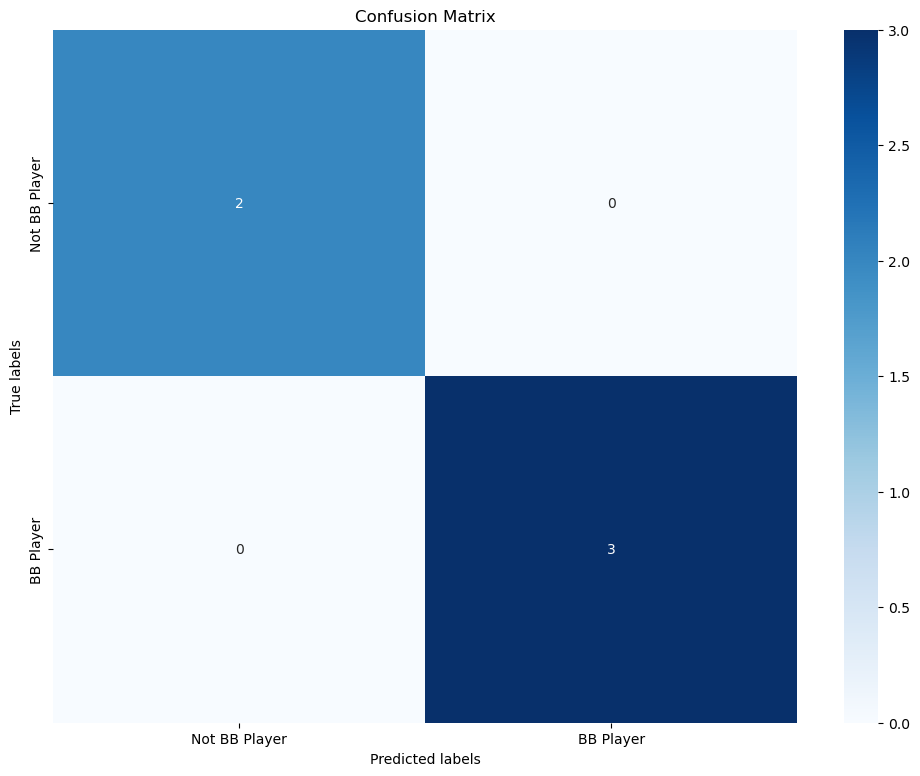

In [20]:
#import seaborn as sns 
#from sklearn.metrics import confusion_matrix   

cm = confusion_matrix(labels, Prediction)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')  
#annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Not BB Player", "BB Player"])
ax.yaxis.set_ticklabels(["Not BB Player", "BB Player"])